---- Part 1: Coin Toss and Dice Sum Probability ----
Coin Toss Simulation (10,000 trials):
Probability of Heads: 0.5032
Probability of Tails: 0.4968

Probability of sum 7 when rolling two dice: 0.1599


---- Part 2: At Least One 6 in 10 Rolls ----
Estimated Probability of at least one 6 in 10 rolls: 0.833


---- Part 3: Conditional Probability and Bayes' Theorem ----
P(Red | Previous was Blue): 0.2169
Bayes Theorem Estimate: 0.2212


---- Part 4: Discrete Random Variable Statistics ----
Empirical Mean: 2.1460
Empirical Variance: 0.6247
Empirical Standard Deviation: 0.7904


---- Part 5: Exponential Distribution Simulation ----


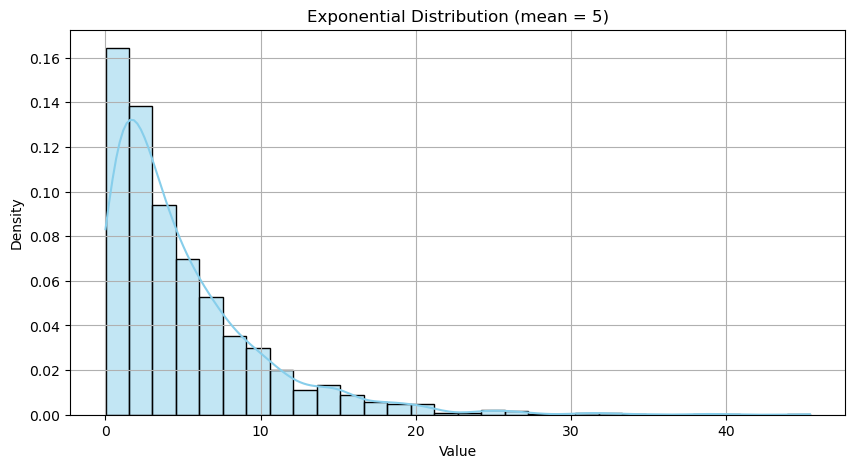

---- Part 6: Central Limit Theorem Simulation ----


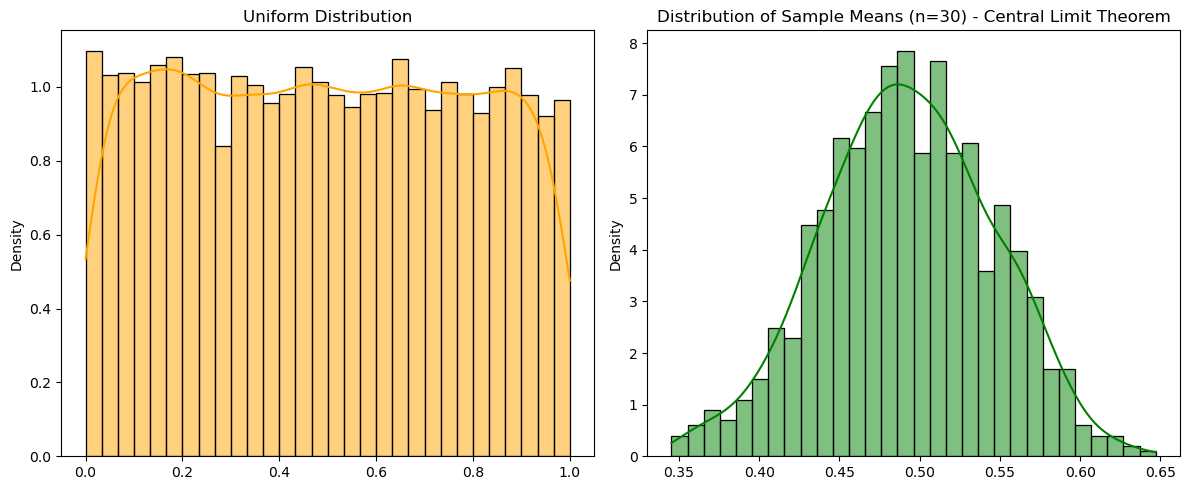

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Coin Toss and Dice Sum Probability
print("---- Part 1: Coin Toss and Dice Sum Probability ----")
coin_outcomes = {"Heads": 0, "Tails": 0}
for _ in range(10000):
    toss = random.choice(["Heads", "Tails"])
    coin_outcomes[toss] += 1

print("Coin Toss Simulation (10,000 trials):")
print(f"Probability of Heads: {coin_outcomes['Heads'] / 10000:.4f}")
print(f"Probability of Tails: {coin_outcomes['Tails'] / 10000:.4f}\n")

sum_7_count = 0
for _ in range(10000):
    die1, die2 = random.randint(1, 6), random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7_count += 1

print("Probability of sum 7 when rolling two dice:", sum_7_count / 10000)
print("\n")

# Part 2: At Least One 6 in 10 Rolls
print("---- Part 2: At Least One 6 in 10 Rolls ----")
def estimate_probability_one_six(trials=10000):
    success_count = 0
    for _ in range(trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success_count += 1
    return success_count / trials

print("Estimated Probability of at least one 6 in 10 rolls:", estimate_probability_one_six())
print("\n")

# Part 3: Conditional Probability and Bayes' Theorem
print("---- Part 3: Conditional Probability and Bayes' Theorem ----")
colors = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
draws = []
for _ in range(1000):
    draws.append(random.choice(colors))

# a. P(Red | Previous was Blue)
red_after_blue = 0
blue_count = 0
for i in range(1, len(draws)):
    if draws[i-1] == 'blue':
        blue_count += 1
        if draws[i] == 'red':
            red_after_blue += 1

conditional_prob = red_after_blue / blue_count
print(f"P(Red | Previous was Blue): {conditional_prob:.4f}")

# b. Bayes' Theorem Estimate
p_red = draws.count('red') / len(draws)
p_blue = draws.count('blue') / len(draws)
blue_after_red = 0
red_count = 0
for i in range(1, len(draws)):
    if draws[i-1] == 'red':
        red_count += 1
        if draws[i] == 'blue':
            blue_after_red += 1

p_b_given_r = blue_after_red / red_count
bayes_estimate = (p_b_given_r * p_red) / p_blue
print(f"Bayes Theorem Estimate: {bayes_estimate:.4f}")
print("\n")

# Part 4: Discrete Random Variable Statistics
print("---- Part 4: Discrete Random Variable Statistics ----")
values = [1, 2, 3]
probs = [0.25, 0.35, 0.4]
sample = np.random.choice(values, size=1000, p=probs)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}")
print("\n")

# Part 5: Exponential Distribution Simulation
print("---- Part 5: Exponential Distribution Simulation ----")
data = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(10,5))
sns.histplot(data, kde=True, stat="density", bins=30, color="skyblue")
plt.title("Exponential Distribution (mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# Part 6: Central Limit Theorem Simulation
print("---- Part 6: Central Limit Theorem Simulation ----")
uniform_data = np.random.uniform(0, 1, 10000)

sample_means = []
for _ in range(1000):
    sample = np.random.choice(uniform_data, size=30)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(12,5))

# Uniform distribution plot
plt.subplot(1,2,1)
sns.histplot(uniform_data, bins=30, color='orange', stat="density", kde=True)
plt.title("Uniform Distribution")

# Sample mean distribution
plt.subplot(1,2,2)
sns.histplot(sample_means, bins=30, color='green', stat="density", kde=True)
plt.title("Distribution of Sample Means (n=30) - Central Limit Theorem")

plt.tight_layout()
plt.show()
